In [ ]:
LASTFILE="csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
DataIn = open(LASTFILE).readlines()
SEARCH = input("SEARCH: ")
cnt = 0
CNTS=0
counts=[]
for line in DataIn:
    cnt=cnt+1
    line=line.lstrip(",")
    if SEARCH in line:print(line)

Max Latitude:  99.0
Min Latitude:  3.0
Max Longitude:  15.0
Max Longitude:  0.0


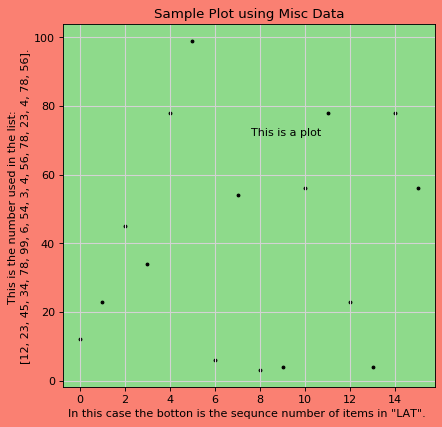

In [46]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np

LAT=[12,23,45,34,78,99,6,54,3,4,56,78,23,4,78,56]
LONG=(range(0,len(LAT)))


LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))

fig = plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

text(0.6, 0.7, 'This is a plot', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
s=6
#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('In this case the botton is the sequnce number of items in "LAT". ')
plt.title('Sample Plot using Misc Data')
plt.ylabel('This is the number used in the list: \n'+str(LAT)+'.')
plt.show()

In [2]:
!pwd

/home/jack/Desktop/COVID-19


In [10]:
CASESs =[]


--SPANS-Span in Hours between recordings. 270 ---------------------------------------------------------
Last timespan 2.0 hours


--ALLdata- 269 ---------------------------------------------------------
('07/04/2020 00:49:00', 1586191740, 2.0, '367004', '10871') 


--EPOCHS-(Total number of timestamps.) 269 ---------------------------------------------------------
1586191740 


--ACCs- 270 ---------------------------------------------------------
Timestamp of Last entry:  669.3 

Number of days activity has been recorded. 27.8875

++++++++++++++++++++++++++++++++++++++

len(SPANS) 270
len(ACCs) 270
len(CASESs) 270
len(DEATHs) 270
First Recorded Confirmed Case Count:  537
Start of Accumulated Time in Days:  0
Record Keeping Started  'March 08, with 537 confirmed cases and 21 Deaths
Number of Hours Records have been kept: 669.3
Current Confirmed Cases:  367004
Last Death Count:  10871

-- Debug Info -------------------------------------
len(CASESs) 270
len(DEATHS) 270
len(ACCs) 270


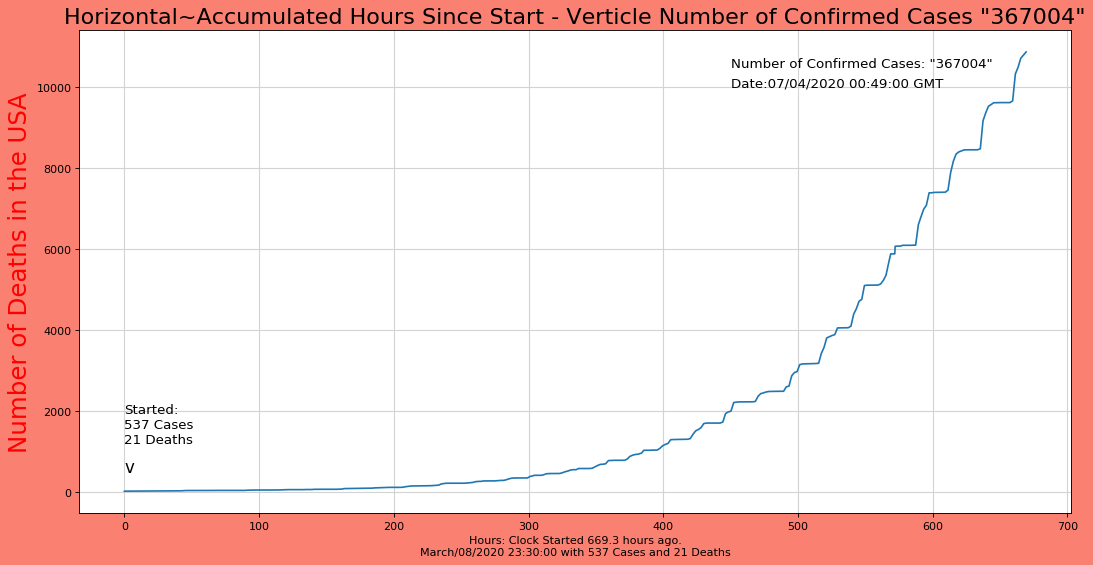

In [45]:
import datetime
import calendar
import time
from M2D import *
import sqlite3
import numpy as np
from matplotlib.pyplot import text
from matplotlib import pyplot as plt

arrangedDdata = ''
DDATA =[]
CASESs =[]
DEATHs = []
DDATA.append("Date Time Timestamp SpanBetweenSamples Cases Deaths")
arrangedDdata=arrangedDdata #+"Date, Time, Cases, Deaths, Timestamp, TimeBetweenSamples\n"
conn=sqlite3.connect("/home/jack/Desktop/cOVID-19/DATA/CoronaData2.db")
c= conn.cursor()
cnt=0
for row in c.execute('SELECT rowid,* from CORONA'):
    cnt=cnt+1
    row =str(row)
    row=row.replace(",","")
    row = row.split(" ")
    if cnt==1:start= row[0][2:],row[1],row[2]
    CASESs.append(row[10])
    DEATHs.append(row[14])
    
    #print (row)
    #print (row[1],row[2],row[3],row[5],row[10],row[14])
    Month = row[1]
    #print (Month[1:])
    month = Month2Num(Month[1:])
    #print (month)
    #if cnt==160:print(row)
    #if cnt==160:print(OUT)               
    OUT = row[2]+"/"+month+"/"+row[3]+" "+row[5]+":00 "+row[10]+" "+row[14]
    # Result 03/12/2020 03:25:00 1327 38
    #print (OUT) 
    arrangedDdata = arrangedDdata+OUT+"\n"
conn.close() 


# 3,13,2020,03:45,GMT,1747,41

EPOCHa=[]
Scnt=0


ALLdata=[]
EPOCHS = []
SPANS = []
SPANS.append(0)
SPANS.append(0)
ACCs = []
text =arrangedDdata.split("\n")
text= text[1:-1]
for line in text:
    #print("line",line)
    #line=str(LINE)
    line = line.split(" ")
    CnD = ("split",line[2],line[3])
    #print (str(line[1]+'/'+line[0]+'/'+line[2][:-3]))
    dt = time.strftime(line[0]+' '+line[1])#+' '+line[2][:-3])
    #print ("dt",dt)
    
    dt_ti = dt

    #16-05-2020 02:48:00
    # Pattern to use to create a timestamp
    pattern = '%d/%m/%Y %H:%M:%S'
    #Convert the date (pattern) into a ten digit timestamp. example: 1586141340
    epochs = int(time.mktime(time.strptime(dt_ti, pattern)))
    
    # A function from from M2D import * to convery two timestamps 'last-current' into a span in hours
    if Scnt>1:SPANS.append(span(int(last),int(epochs)))
    #create a one time starting point timestamp called last    
    if Scnt==0:last=1583661400
        
    # create a list of timestamps called EPOCHS, as integers
    EPOCHS.append(int(epochs))
    DEATHS.append(line[3])
    
    #Create a list called ALLdata
    ad = dt_ti, epochs,span(int(last),int(epochs)),line[2],line[3]
    AS =str(ad)
    ALLdata.append(AS)
    
    Scnt=Scnt+1
    
    last = int(epochs)    
    #print (span(int(last),int(epochs)))
    EPOCHa.append(str(epochs))
#create an list of spans in hours as they are accumulated ( converted from timestamps. )    
SPANS.append(SPANS[-1])
acc=0
for accum in SPANS:
    acc=acc+accum
    ACCs.append(round(acc,1)) 
    
START = CASESs[0] 

print("\n--SPANS-Span in Hours between recordings.",len(SPANS),"---------------------------------------------------------")    
print ("Last timespan",SPANS[-1],"hours\n")
print("\n--ALLdata-",len(ALLdata),"---------------------------------------------------------")
print (ALLdata[-1],"\n")
print("\n--EPOCHS-(Total number of timestamps.)",len(EPOCHS),"---------------------------------------------------------")
print (EPOCHS[-1],"\n")
print("\n--ACCs-",len(ACCs),"---------------------------------------------------------")
print ("Timestamp of Last entry: ",ACCs[-1],"\n")
print("Number of days activity has been recorded.",ACCs[-1]/24)
print ("\n++++++++++++++++++++++++++++++++++++++\n")
print ("len(SPANS)",len(SPANS))
print ("len(ACCs)",len(ACCs))
print ("len(CASESs)",len(CASESs))
print ("len(DEATHs)",len(DEATHs))
#3-15-2020 19:00,3329
print ("First Recorded Confirmed Case Count: ",CASESs[0])
print ("Start of Accumulated Time in Days: ",ACCs[1])
print ("Record Keeping Started",' '.join(start)+", with",START,"confirmed cases and",DEATHs[0],"Deaths")
print ("Number of Hours Records have been kept:",ACCs[-1])
print ("Current Confirmed Cases: ",CASESs[-1])
print ("Last Death Count: ", DEATHs[-1])
print ("\n-- Debug Info -------------------------------------")
print ("len(CASESs)",len(CASESs))
print ("len(DEATHS)",len(DEATHs))
print ("len(ACCs)",len(ACCs))


x = np.array(ACCs,dtype=np.float)
y = np.array(CASESs,dtype=np.int)
d = np.array(DEATHs,dtype=np.int)
fig = plt.figure(num=None, figsize=(16,8), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

ax.grid(color='lightgray', linestyle='-', linewidth=1)
#plt.scatter(x, y, s=3)


plt.plot(x, d)
#plt.yscale('log')
#plt.yscale('symlog', linthreshy=0.01)
#plt.scatter(x, d, s=3, color='red')
#plt.scatter(x, y, s=3, color='blue')

plt.title('log')
plt.grid(True)


#plt.grid(True)

plt.xlabel('Hours: Clock Started '+str(ACCs[-1])+' hours ago.\nMarch/08/2020 23:30:00 with 537 Cases and 21 Deaths')
plt.title('Horizontal~Accumulated Hours Since Start - Verticle Number of Confirmed Cases "'+str(CASESs[-1])+'"', fontsize=20)
LastEntryDate=str(ALLdata[-1]).split("'")[1]


s0= 'Number of Confirmed Cases: "'+str(CASESs[-1])+'"'
plt.text(450, 10500, s0, fontsize=12)

s1= "Date:"+LastEntryDate+" GMT"
plt.text(450, 10000, s1, fontsize=12)

s2= 'Started:\n537 Cases\n21 Deaths'
plt.text(0, 1200, s2, fontsize=12)
s= 'v'
plt.text(0, 500, s, fontsize=15)
plt.ylabel('Number of Deaths in the USA', fontsize=22, color="red")
fig.savefig('images/plot-Deaths-002.png', facecolor=fig.get_facecolor(), edgecolor='black')
plt.show()

In [39]:
print(ALLdata[-1])
LastEntryDate=str(ALLdata[-1]).split("'")[1]
print(LastEntryDate)


('06/04/2020 22:49:00', 1586184540, 2.0, '364066', '10792')
06/04/2020 22:49:00


In [5]:
import datetime
import calendar
import time
from M2D import *
import sqlite3

arrangedDdata = ''
arrangedDdata=arrangedDdata+"date_time,cases\n"
conn=sqlite3.connect("/home/jack/Desktop/cOVID-19/DATA/CoronaData2.db")
c= conn.cursor()
for row in c.execute('SELECT rowid,* from CORONA'):
    MISC=row[1]
    Str = MISC.split(" ")
    month = Str[0][0:5]
    OUT = Month2Num(month)+","+MISC[5:15]+" "+MISC[18:24]+":00"
    OUT = OUT.replace(", ","-")
    OUT = OUT.replace("c","")
    #OUT = OUT.replace(",","-")
    OUT = OUT.replace(" ",",");
    OUT = OUT.replace(",,"," ")
    OUT = OUT.rstrip(",");
    OUT = OUT.replace(",","") 
    #print (OUT) 
    arrangedDdata = arrangedDdata+OUT+"\n"
conn.close() 

text =arrangedDdata.split("\n")
text= text[1:-1]
EPOCHa=[]
Scnt=0
SPANS = []
for line in text:
    #print(line)
    #line=str(LINE)
    line = line.split("-")
    #print (line)
    #print (str(line[1]+'/'+line[0]+'/'+line[2][:-3]))
    dt = time.strftime((str(line[1]+'/'+line[0]+'/'+line[2][:-3])))
    #print (dt+":00")

    dt_ti = dt+":00"
    #print (dt_ti)
    #03-16-2020 02:48,3777
    pattern = '%d/%m/%Y %H:%M:%S'
    #pattern = '%m/%d/%Y %H:%M:%S'
    epochs = int(time.mktime(time.strptime(dt_ti, pattern)))
    #print (dt_ti, epochs)
    
    if Scnt>1:SPANS.append(span(int(last),int(epochs)))
    if Scnt==0:last=1583661400  
    SPan = span(int(last),int(epochs))    
    data = dt_ti+" "+str(epochs)+" "+str(SPan)
    
    entry = str(data)
    Scnt=Scnt+1
    
    last = int(epochs)    
    #print (span(int(last),int(epochs)))
    EPOCHa.append(data)
    
    
for lines in EPOCHa:
    print (lines)
     
conn.close() 
count = 0
ACCs = []
ACCs.append(0)
ACCs.append(0)
ACCs.append(0)
acc=0
for accum in SPANS:
    acc=acc+accum
    ACCs.append(round(acc,1))
START = CASESs[0]


#3-15-2020 19:00,3329
print ("First Recorded Confirmed Case Count: ",CASESs[0])
print ("Start of Accumulated Time in Days: ",ACCs[1])
print ("Record Keeping Started",' '.join(start)+", with",START,"confirmed cases and",DEATHs[0],"Deaths")
print ("Number of Hours Records have been kept:",ACCs[-1])
print ("Current Confirmed Cases: ",CASESs[-1])
print ("Last Death Count: ", DEATHs[-1])
print ("\n-- Debug Info -------------------------------------")
print ("len(CASESs)",len(CASESs))
print ("len(DEATHS)",len(DEATHs))
print ("len(ACCs)",len(ACCs))


x = np.array(ACCs,dtype=np.float)
y = np.array(CASESs,dtype=np.int)
d = np.array(DEATHs,dtype=np.int)
fig = plt.figure(num=None, figsize=(16,8), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

ax.grid(color='lightgray', linestyle='-', linewidth=1)
#plt.scatter(x, y, s=3)


plt.plot(x, d)
#plt.yscale('log')
#plt.yscale('symlog', linthreshy=0.01)
#plt.scatter(x, d, s=3, color='red')
#plt.scatter(x, y, s=3, color='blue')

plt.title('log')
plt.grid(True)


#plt.grid(True)

plt.xlabel('Hours: Clock Started '+str(ACCs[-1])+' hours ago.\nMarch/08/2020 23:30:00 with 537 Cases and 21 Deaths')
plt.title('Horizontal~Accumulated Hours Since Start - Verticle Number of Confirmed Cases "'+str(CASESs[-1])+'"', fontsize=20)

s0= 'Number of Confirmed Cases "'+str(CASESs[-1])+'"'
plt.text(450, 10500, s0, fontsize=12)

s1= 'Started:\n537 Cases\n21 Deaths'
plt.text(0, 1200, s1, fontsize=12)
s1= 'Started:\n537 Cases\n21 Deaths'
plt.text(0, 1200, s1, fontsize=12)
s= 'v'
plt.text(0, 500, s, fontsize=15)
plt.ylabel('Number of Deaths in the USA', fontsize=22, color="red")
fig.savefig('images/plot-Deaths-002.png', facecolor=fig.get_facecolor(), edgecolor='black')
plt.show()

08/03/2020 23:30:00 1583681400 5.56
09/03/2020 04:30:00 1583699400 5.0
10/03/2020 05:30:00 1583789400 25.0
10/03/2020 23:35:00 1583854500 18.08
11/03/2020 04:25:00 1583871900 4.83
11/03/2020 15:17:00 1583911020 10.87
11/03/2020 23:35:00 1583940900 8.3
12/03/2020 03:25:00 1583954700 3.83
12/03/2020 11:37:00 1583984220 8.2
12/03/2020 22:00:00 1584021600 10.38
13/03/2020 00:05:00 1584029100 2.08
13/03/2020 01:35:00 1584034500 1.5
13/03/2020 03:45:00 1584042300 2.17
13/03/2020 06:00:00 1584050400 2.25
13/03/2020 15:25:00 1584084300 9.42
13/03/2020 22:25:00 1584109500 7.0
14/03/2020 02:40:00 1584124800 4.25
14/03/2020 07:14:00 1584141240 4.57
14/03/2020 16:45:00 1584175500 9.52
14/03/2020 23:03:00 1584198180 6.3
15/03/2020 05:00:00 1584219600 5.95
15/03/2020 05:40:00 1584222000 0.67
15/03/2020 07:05:00 1584227100 1.42
15/03/2020 19:00:00 1584270000 11.92
15/03/2020 20:05:00 1584273900 1.08
15/03/2020 21:15:00 1584278100 1.17
15/03/2020 22:15:00 1584281700 1.0
16/03/2020 00:35:00 1584290100 

NameError: name 'CASESs' is not defined

In [ ]:
import sqlite3
from M2D import Month2Num
arrangedDdata = ''
CASESs = []
DEATHs = []
arrangedDdata=arrangedDdata+"date_time,cases\n"
conn=sqlite3.connect("DATA/CoronaData2.db")
c= conn.cursor()
cnt = 0
for rows in c.execute('SELECT * from CORONA'):
    cnt = cnt  +1
    #if cnt==1:print(rows)
    rows=str(rows)
    row = rows.split(" ")
    if cnt==1:print(row[0][2:],row[1],row[2]+":00",row[4],row[9],row[13])
    if cnt==1:start= row[0][2:],row[1],row[2]   
    CASESs.append(row[9])
    DEATHs.append(row[13])
    
conn.close() 
count = 0
ACCs = []
ACCs.append(0)
ACCs.append(0)
ACCs.append(0)
acc=0
for accum in SPANS:
    acc=acc+accum
    ACCs.append(round(acc,1))
START = CASESs[0]


#3-15-2020 19:00,3329
print ("First Recorded Confirmed Case Count: ",CASESs[0])
print ("Start of Accumulated Time in Days: ",ACCs[1])
print ("Record Keeping Started",' '.join(start)+", with",START,"confirmed cases and",DEATHs[0],"Deaths")
print ("Number of Hours Records have been kept:",ACCs[-1])
print ("Current Confirmed Cases: ",CASESs[-1])
print ("Last Death Count: ", DEATHs[-1])
print ("\n-- Debug Info -------------------------------------")
print ("len(CASESs)",len(CASESs))
print ("len(DEATHS)",len(DEATHs))
print ("len(ACCs)",len(ACCs))


x = np.array(ACCs,dtype=np.float)
y = np.array(CASESs,dtype=np.int)
d = np.array(DEATHs,dtype=np.int)
fig = plt.figure(num=None, figsize=(16,8), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

ax.grid(color='lightgray', linestyle='-', linewidth=1)
#plt.scatter(x, y, s=3)


plt.plot(x, d)
#plt.yscale('log')
#plt.yscale('symlog', linthreshy=0.01)
#plt.scatter(x, d, s=3, color='red')
#plt.scatter(x, y, s=3, color='blue')

plt.title('log')
plt.grid(True)


#plt.grid(True)

plt.xlabel('Hours: Clock Started '+str(ACCs[-1])+' hours ago.\nMarch/08/2020 23:30:00 with 537 Cases and 21 Deaths')
plt.title('Horizontal~Accumulated Hours Since Start - Verticle Number of Confirmed Cases "'+str(CASESs[-1])+'"', fontsize=20)

s0= 'Number of Confirmed Cases "'+str(CASESs[-1])+'"'
plt.text(450, 10500, s0, fontsize=12)

s1= 'Started:\n537 Cases\n21 Deaths'
plt.text(0, 1200, s1, fontsize=12)
s1= 'Started:\n537 Cases\n21 Deaths'
plt.text(0, 1200, s1, fontsize=12)
s= 'v'
plt.text(0, 500, s, fontsize=15)
plt.ylabel('Number of Deaths in the USA', fontsize=22, color="red")
fig.savefig('images/plot-Deaths-002.png', facecolor=fig.get_facecolor(), edgecolor='black')
plt.show()

In [ ]:
https://www.latlong.net/
    https://www.census.gov/

In [ ]:
!git clone https://github.com/CSSEGISandData/COVID-19.git

In [ ]:
!git pull

In [ ]:
!ls csse_covid_19_data/csse_covid_19_daily_reports/

In [ ]:
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-05-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
cnt=0
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if "Florida" in line[2] and "-" in (line[6]):
        cnt=cnt+1
        if cnt<5:print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        entry = line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(entry)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        

# Prepare to draw the Plot

In [ ]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))

fig = plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()





text(0.6, 0.7, 'Cleveland', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
s=1
#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)



plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

In [ ]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))

fig = plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()


text(0.6, 0.7, 'Cleveland', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
s=1
#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)



plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

In [ ]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if "Florida" in line[2] and "-" in (line[6]):
        #print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))
print((max(LG)-min(LG))*69)
print((max(LT)-min(LT))*69)

fig = plt.figure(num=None, figsize=(8,8), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

text(0.8, 0.11, 'Miami-Dade', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

# OHIO

In [ ]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if "Ohio" in line[2] and "-" in (line[6]):
        #print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))
print((max(LG)-min(LG))*69)
print((max(LT)-min(LT))*69)

fig = plt.figure(num=None, figsize=(8,8), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

text(0.8, 0.91, 'Cleveland', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

In [ ]:
from matplotlib import pyplot as plt

import numpy as np
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-05-2020.csv"
DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []
STate = input("What State? ")
for lines in DataIn:
    lines = lines.replace("\n","")

    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<2:print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON

print("len(LA)",len(LA))
print("len(LO)",len(LO))
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)
print ('min(LG)',min(LG))
print ('max(LG)',max(LG))
print ("min(LT)",min(LT))
print ("max(LT)",max(LT))
print("----------------------")

print('len(LT)',len(LT))
print('len(LG)',len(LG))

print ("min(cases)",min(cases))
print("max(cases)",max(cases))
print("len(cases)",len(cases))
print("cases",cases)
fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='red')
ax = fig.gca()

ax.set_facecolor(('white'))

S=1
Size=[]
for x in cases:
    S=3+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)



lgmin= (min(LG))-4
lgmax= (max(LG))+4
ltmin= (min(LT))+4
ltmax= (max(LT))-4

print ('lgmin',lgmin)# = (min(LG))+5
print ('lgmax',lgmax)# = (max(LG))-5
print ('ltmin',ltmin)# = (min(LT))+5
print ('ltmax',ltmax)# = (max(LT))-5


#longLeft= (min(LG))-3
#longRight = (max(LG))+3
#latTop = (min(LT))-3
#latBottom = (max(LT))+3
#plt.axis([longLeft,longRight,latTop,latBottom])

#plt.axis([lgmin,lgmax,ltmin,ltmax ])


#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="blue")
plt.grid(True)
#plt.text(50,50, "Verticle lines are Longitude, Horizontal lines are Latitude")
text = (50,50, "Verticle lines are Longitude, Horizontal lines are Latitude")
plt.xlabel('This plot is of: '+STate, fontsize=20)
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19', fontsize=16, color="white")
plt.ylabel('The Dot size is relative to the number of cases')
plt.show()

In [ ]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
Search = input("Which State? ")
longitude = ""
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if Search in line[2] and "-" in (line[6]):
        #print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))
print(int(max(LG)-min(LG))*.69)
print(int(max(LT)-min(LT))*.69)

H = (int(max(LG)-min(LG))*.69*2)
V = (int(max(LT)-min(LT))*.69*2)

fig = plt.figure(num=None, figsize=(H,V), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#text(0.6, 0.1, 'Detroit', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
S=1
Size=[]
for x in cases:
    S=3+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

In [ ]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if "California" in line[2] and "-" in (line[6]):
        #print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))
print(int(max(LG)-min(LG))*.69)
print(int(max(LT)-min(LT))*.69)

H = (int(max(LG)-min(LG))*.69)
V = (int(max(LT)-min(LT))*.69)

fig = plt.figure(num=None, figsize=(H,V), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

text(0.6, 0.1, 'Los Angeles', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

In [ ]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if "Washington" in line[2] and "-" in (line[6]):
        #print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))
print(int(max(LG)-min(LG))*.69)
print(int(max(LT)-min(LT))*.69)

H = (int(max(LG)-min(LG))*.69)
V = (int(max(LT)-min(LT))*.69)
Factor=round((H/V),3)
print("Factor:",Factor)
fig = plt.figure(num=None, figsize=(5,5*Factor), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#text(0.6, 0.1, 'Los Angeles', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

In [ ]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))
print((max(LG)-min(LG))*69)
print((max(LT)-min(LT))*69)

fig = plt.figure(num=None, figsize=(8,9), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

text(0.8, 0.11, 'Miami-Dade', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

In [ ]:
import numpy as geek 
import pylab as p 
  
# Start = 0 
# End = 2 
# Samples to generate = 10 
x1 = geek.linspace(0, 2, 20, endpoint = "False") 
y1 = geek.ones(20) 
  
p.plot(x1, y1, '*', color='red') 
p.xlim(-0.2, 3) 

In [ ]:
import numpy as geek 
import pylab as p 
print (len(LG))
lg= len(LG)
print (LG[1])
print (LG[-1])
print("----------------")
print (max(LT))
print (min(LT))
print (max(LG))
print (min(LG))
print("----------------")
ylim0=(max(LT))+.5
ylim1=(min(LT))+.5
xlim1=max(LG)-.5
xlim0=min(LG)-.5

print(ylim0)
print(ylim1)
print(xlim0)
print(xlim1)
fig = plt.figure(num=None, figsize=(6,5), dpi=120, facecolor='salmon')



# Start = 0 
# End = 2 
# Samples to generate = 10 
x1 = geek.linspace(0, 2, 10, endpoint = False) 
y1 = geek.ones(10) 
  
p.plot(LG, LT, '.') 
p.xlim(xlim0, xlim1) 
p.ylim(ylim1, ylim0) 

In [ ]:
w = 10
h = 12
d = 80
plt.figure(figsize=(w, h,), dpi=d)
fig, ax = plt.subplots()
ax.scatter(LG, LT, s=2)

In [ ]:
#y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
#z = [0.15, 0.3, 0.45, 0.6, 0.75]
#txt = 'Dade'
ax.axis([-88, -80, 24, 31])

ax.text(25,81, ". Data: (1, 5)", transform=ax.transData)
ax.text(85, 26, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(87, 27, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

fig, ax = plt.subplots()
#ax.annotate(txt, (3, 3))
ax.scatter(x, y)




In [ ]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);
fig, ax = plt.subplots()
#ax.annotate(txt, (3, 3))
ax.scatter(x, y)

# Position Text
https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html

In [ ]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))

fig = plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

text(0.8, 0.11, 'Miami-Dade', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

In [ ]:
%%writefile M2D.py
"""
Month2Num(month)
span(timestamp1, timestamp2): This will show the span in hours between two timestamps.

"""
from __future__ import division
def Month2Num(month):
    number=""
    months=["January","February","March","April","May","June","July",\
            "August","September","October","November","December"]
    Numbers=["01","02","03","04","05","06","07","08","09","10","11","12"]
    if month==months[0]:number=Numbers[0]
    if month==months[1]:number=Numbers[1]
    if month==months[2]:number=Numbers[2]
    if month==months[3]:number=Numbers[3]
    if month==months[4]:number=Numbers[4]
    if month==months[5]:number=Numbers[5]
    if month==months[6]:number=Numbers[6]
    if month==months[7]:number=Numbers[7]
    if month==months[8]:number=Numbers[8]
    if month==months[9]:number=Numbers[9]
    if month==months[10]:number=Numbers[10]
    if month==months[11]:number=Numbers[11]    
    return number

def span(timestamp1, timestamp2):
    SPAN = timestamp2-timestamp1
    res =SPAN/3600
    result = round(res,2)
    return result


In [ ]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);


In [ ]:
# doubling the width of markers
x = [0,2,4,6,8,10]
y = range(0, len(x))
s = [20*2**n for n in range(len(x))]

plt.scatter(x,y,s=s)


plt.show()

In [ ]:
y = [0,2,4,6,8,10]
z = range(0, len(x))
n = [20*2**n for n in range(len(x))]
fig, ax = plt.subplots()
ax.scatter(z, y, s=s, color="lightGray")

for i, txt in enumerate(n):
    #if int(txt)>80 and int(txt)<640:
        ax.annotate(txt, (z[i], y[i]))

In [ ]:
y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
z = [0.15, 0.3, 0.45, 0.6, 0.75]
n = [58, 651, 393, 203, 123]

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [ ]:
14.5995° N, 120.9842° E

In [ ]:
import matplotlib.pyplot as plt
w = 4
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)
x = LG
y = LT
x_pos = 1
y_pos = 2
#plt.text(x_pos, y_pos, "text on plot")

plt.plot(x,y)

In [ ]:
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    print(int(S))
s = np.array(Size)

In [ ]:
s = [.1*n for n in range(len(cases))]
for I in s:
    print (int(I))

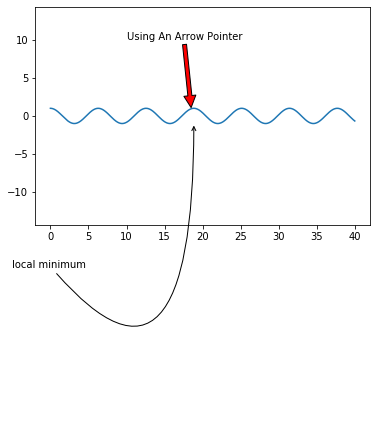

In [92]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 40, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('Using An Arrow Pointer', xy=(18.5, 1), xytext=(10, 10),
            arrowprops=dict(facecolor='red', shrink=.01))

ax.annotate('local minimum', xy=(6 * np.pi, -1), xytext=(-5, -20),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=-50,angleB=-90"));


In [ ]:
from __future__ import division, absolute_import, print_function
from graph_tools import Graph
from graph_tools import *
import sys
if sys.version_info < (3,):
    range = xrange
import os
from pylab import *  # for plotting
from numpy.random import *  # for random sampling

In [ ]:
v_age = g.new_vertex_property("int")
      e_age = g.new_edge_property("int")
      

AttributeError: 'Graph' object has no attribute 'new_vertex_property'


In [ ]:
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
cnt=0
for line in DataIn:
    cnt=cnt+1
    if cnt==1:print(line)
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if "Germany" in line:
        if (len(line))==9:print(line[0],line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        longitude = longitude+line[6]+","

# List all Countries

In [ ]:
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
cnt=0
Cnt=0
for line in DataIn:
    cnt=cnt+1
    if cnt==1:print(line)
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if (len(line))==9:Cnt=Cnt+1
    if (len(line))==9 and len(line[1])>4:
        print(line[0],line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
    STATES.append(text)
    LAT.append(line[5])
    LONG.append(line[6])
    cases.append(line[7])
    longitude = longitude+line[6]+","
print(Cnt)

In [ ]:
https://anthonylouisdagostino.com/bounding-boxes-for-all-us-states/